In [30]:
import pandas as pd
import numpy as np

Load Data
---

In [31]:
energy_2018 = pd.read_csv("data/nordpool2018_clean.csv")

In [32]:
energy_2018.describe()

,price,date,hour
count,8761.000000,8761.000000,8761.000000
mean,476.510086,4380.000000,11.498916
std,149.164841,2529.227188,6.922931
min,0.000000,0.000000,0.000000
25%,391.460000,2190.000000,5.000000
50%,466.010000,4380.000000,11.000000
75%,547.660000,6570.000000,17.000000
max,2573.410000,8760.000000,23.000000


Visualize
---

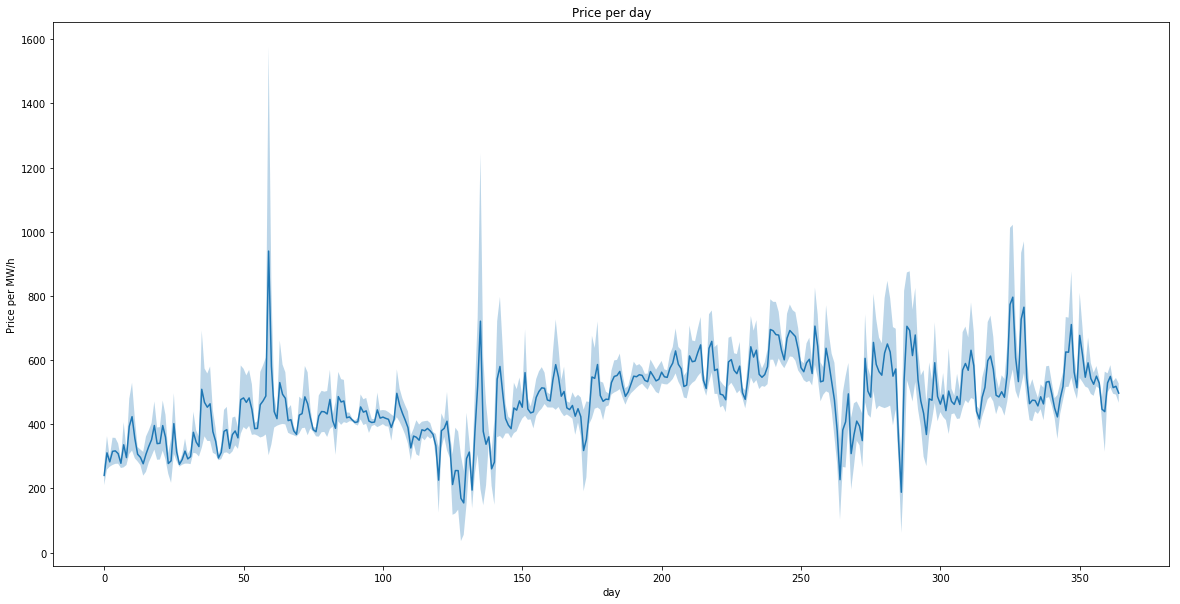

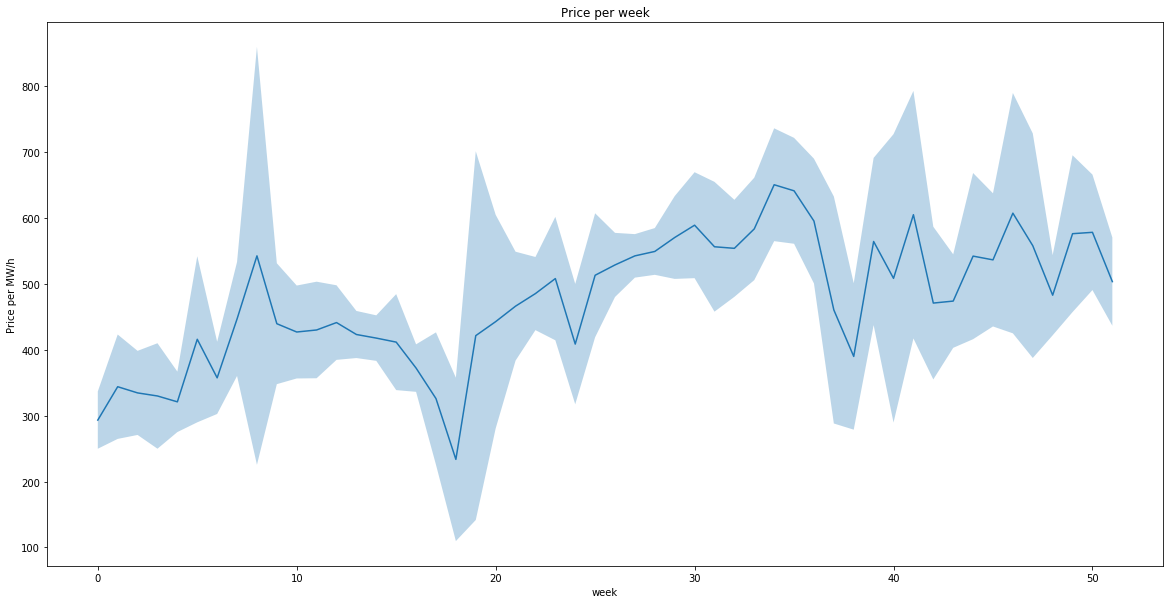

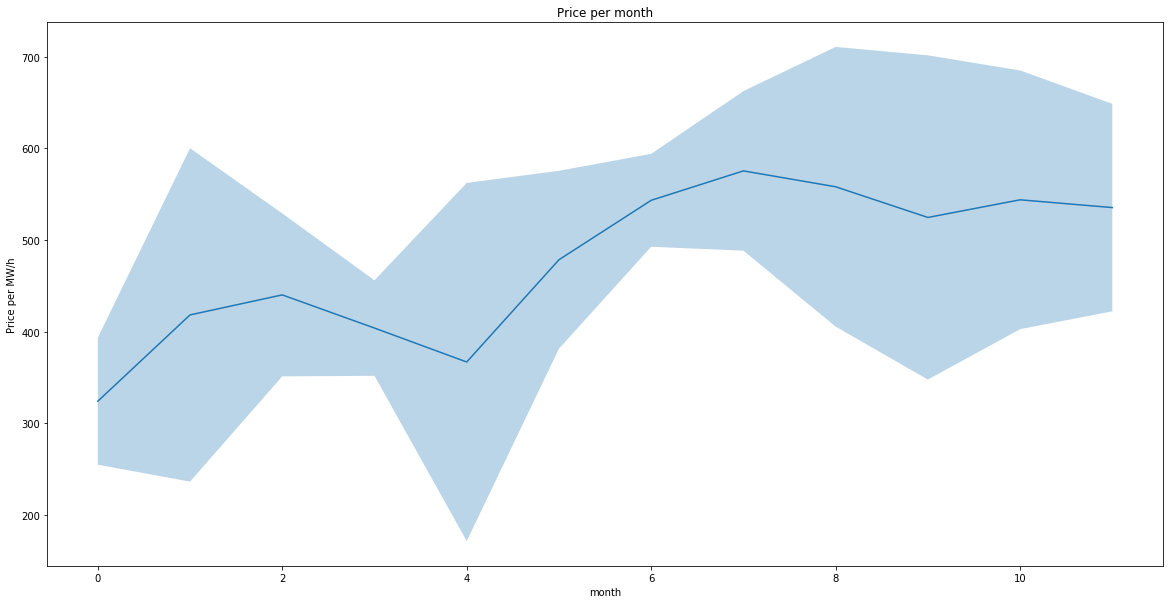

In [33]:
import seaborn as sb
import matplotlib.pyplot as plt

periods = [
    (24, "day"), 
    (24 * 7, "week"),
    (24 * 30, "month") 
]

for period, name in periods:
    fig, ax = plt.subplots(1, figsize=(20, 10))
    mean = []
    std = []
    for time in list(zip(*(iter(energy_2018['price']), ) * period)):
        mean.append(np.mean(time))
        #if np.std(time) != np.std(time):
         #   print(time)
        std.append(np.std(time))
    
    mean = np.array(mean)
    std = np.array(std)
    
    sb.lineplot(np.arange(mean.shape[0]), mean, ax=ax)
    ax.fill_between(np.arange(mean.shape[0]), mean + std * 1, mean - std * 1, alpha=0.3)
    ax.set_title("Price per %s" % name)
    ax.set_ylabel("Price per MW/h")
    ax.set_xlabel("%s" % name)
    



What do? Smart Charging!
---